# Livestock Production Data Exploration

In [1]:
class ReadData():
    """
    # Usage:
    # df = ReadData(file_name, url).createDF() 
    """
    def __init__(self, file_name, 
                 url = None,
                 org_name = 'good-food', 
                 repo_name = 'datamap2019', 
                 folder_path = '/data/', 
                 mode = 'wb'
                ):
        
        self.file_name = file_name
        self.org_name = org_name
        self.repo_name = repo_name
        self.folder_path = folder_path
        
        self.url = url
        self.mode = mode
        
        self.root_path = 'https://github.com/'
        self.raw_path = 'https://raw.githubusercontent.com/'
        self.branch = 'master'

    def getPath(self):
        if self.url == None:
            path = self.root_path + self.org_name + '/' + self.repo_name + '/blob/' + self.branch + self.folder_path + self.file_name
            raw_path = self.raw_path + self.org_name + '/' + self.repo_name + '/' + self.branch + self.folder_path + self.file_name
        else:
            raw_path = self.url
            
        print('Url: ', path)
        print('Raw data:', raw_path)
        return raw_path

    def curl(self):
        import urllib.request, urllib.parse, urllib.error
        
        url = self.getPath()
        response = urllib.request.urlopen(url).read()
        with open(self.file_name, self.mode) as file_handle:
            file_handle.write(response)

    def delFile(self):
        import os

        if os.path.exists(self.file_name):
            os.remove(self.file_name)
        else:
            print('no such file:%s'%self.file_name)

    def createDF(self):
        import pandas as pd
        import time
        
        print(data_name, 'is under dealing... needs 1 min')
        self.curl()
        time.sleep(10)
        df = pd.read_csv(self.file_name)
        self.delFile()
        return df

In [2]:
# input
item = 'product_livestock'

In [3]:
data_name = item + '_clean.csv'
df_data = ReadData(data_name).createDF()
df_data.head()

product_livestock_clean.csv is under dealing... needs 1 min
Url:  https://github.com/good-food/datamap2019/blob/master/data/product_livestock_clean.csv
Raw data: https://raw.githubusercontent.com/good-food/datamap2019/master/data/product_livestock_clean.csv


,AreaName,Year,Stock_largeAni,Stock_cattle,Stock_horse,Stock_donkey,Stock_mule,Stock_camel,Out_hog,Stock_hog,...,MeatYeild_gt_shp,MilkYeild,MilkYeild_cattle,WoolYeild_sheep,WoolYeild_sheep_fine,WoolYeild_sheep_semi,WoolYeild_goat_thick,WoolYeild_goat_cashmere,EggYeild,HoneyYeild
0,China,1996,13360.60,11031.80,871.50,944.40,478.00,34.90,41225.10,36283.60,...,181.000000,735.800000,629.40000,298102.0,121020.0,74099.0,35255.0,9585.00,1965.200,18.4000
1,China,1997,14541.80,12175.70,891.20,952.80,480.60,35.00,46483.70,40034.80,...,212.800000,681.100000,601.10000,255059.0,116054.0,55683.0,25865.0,8626.00,1895.300,21.1000
2,China,1998,14803.20,12441.90,898.10,955.80,473.90,33.50,50215.10,42256.30,...,234.600000,745.400000,662.90000,277545.0,115752.0,68775.0,31417.0,9799.00,2021.300,20.7000
3,China,1999,15024.75,12698.34,891.41,934.77,467.27,32.96,51977.20,43144.20,...,251.264300,806.907300,717.59390,283152.0,114103.0,73700.0,31849.0,10179.65,2134.667,22.9907
4,China,2000,15151.51,12866.34,876.58,922.73,453.03,32.62,52673.34,44681.54,...,273.958296,919.118908,827.43079,292502.0,117386.0,84921.0,33266.0,11057.00,2243.300,24.6000


In [4]:
doc_name = item + '_doc.csv'
df_doc = ReadData(doc_name).createDF()
df_doc

product_livestock_clean.csv is under dealing... needs 1 min
Url:  https://github.com/good-food/datamap2019/blob/master/data/product_livestock_doc.csv
Raw data: https://raw.githubusercontent.com/good-food/datamap2019/master/data/product_livestock_doc.csv


,Feild name,中文解释,Explanation,单位: Unit
0,AreaName,地区 (省级),Area (provincial),Nan
1,Year,年份,Year,Nan
2,Stock_largeAni,大动物存栏量 (牛&马&驴&骡&骆驼),Stock of cattle&hores&donkey&mule&camel,万只: 10000 #
3,Stock_cattle,牛存栏量,Stock of cattle,万只: 10000 #
4,Stock_horse,马存栏量,Stock of horse,万只: 10000 #
5,Stock_donkey,驴存栏量,Stock of donkey,万只: 10000 #
6,Stock_mule,骡存栏量,Stock of mule,万只: 10000 #
7,Stock_camel,骆驼存栏量,Stock of camel,万只: 10000 #
8,Out_hog,猪出栏量,Output of hog,万只: 10000 #
9,Stock_hog,猪存栏量,Stock of hog,万只: 10000 #


In [5]:
# copy a copy of data
df = df_data

## Group the Columns We Interested in

We are interested in the following columns, and they can be grouped for further analysis (the columns may overlaped in defferent groups): 

- Cattle, hog, goat&sheep ('CHGS' for short):
    - 'Stock_cattle', 'Stock_hog', 'Stock_gt_shp', 
    - 'Out_cattle', 'Out_hog', 'Out_gt_shp'
    - 'MeatYeild_cattle', 'MeatYeild_hog', 'MeatYeild_gt_shp'
    - 'Stock_cattle', 'Out_cattle'
    - 'Stock_hog', 'Out_hog'
    - 'Stock_gt_shp', 'Out_gt_shp'
    
    
- Poultry ('birds' for short):
    - 'Out_poultry', 
    - 'EggYeild'
    
    
- Animal product yeilds ('yeilds' for short):
    - 'MeatYeild_cattle', 'MeatYeild_hog', 'MeatYeild_gt_shp', 'MilkYeild', 'EggYeild'

In [6]:
# Stocks, outputs, and meat yeilds of cattle, hog, and goat&sheep.
CHGS_in = ['Stock_hog','Stock_cattle','Stock_gt_shp']
CHGS_out = ['Out_hog', 'Out_cattle','Out_gt_shp']
CHGS_yeild = ['MeatYeild_hog', 'MeatYeild_cattle', 'MeatYeild_gt_shp']
CHGS = CHGS_in + CHGS_out + CHGS_yeild

hog_inout = ['Stock_hog', 'Out_hog']
cattle_inout = ['Stock_cattle', 'Out_cattle']
gs_inout = ['Stock_gt_shp', 'Out_gt_shp']

# Outputs of poultry and yeilds of eggs 
birds_out = ['Out_poultry']
birds_egg = ['EggYeild']
birds = birds_out + birds_egg

# Yeilds of animal products for food
yeilds = ['MeatYeild_hog', 'MeatYeild_cattle', 'MeatYeild_gt_shp', 'MilkYeild_cattle', 'EggYeild']

# AreaNames and Years
AY = ['AreaName', 'Year']

## Data Exploration

### China's National Production of Hog, Cattle, and Goat&Sheep

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

%matplotlib inline

import datetime
year_now = datetime.date.today().year

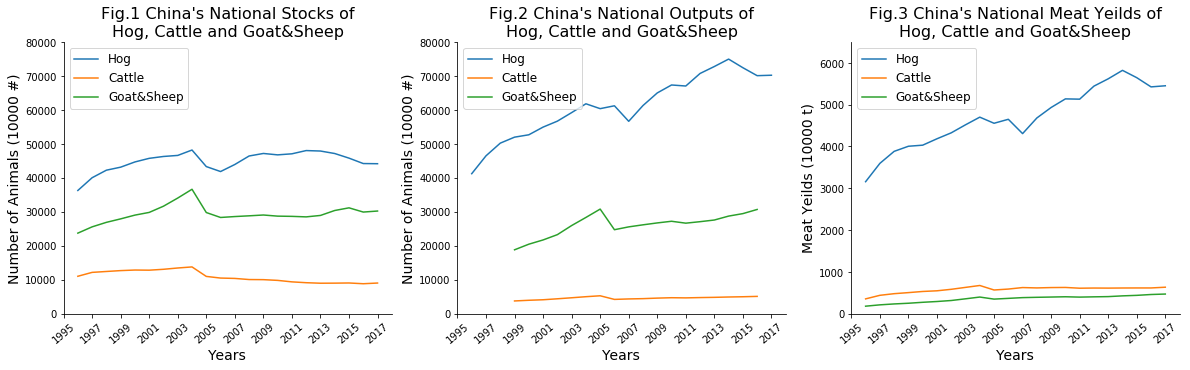

In [8]:
# create figure
fig = plt.figure()

fig.tight_layout()                          # adjust layout
plt.subplots_adjust(wspace =0.2, hspace =0) # adjust white space

fig_size = (20,5)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

# draw subplots of China's National Stocks of Hog, Cattle and Goat&Sheep
ax0 = fig.add_subplot(1,3,1)  # 2 row, 2 columns, 1st plot
df[AY+CHGS_in][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, 
    ax=ax0)

plt.title("Fig.1 China's National Stocks of\nHog, Cattle and Goat&Sheep", fontsize=tit_size)
plt.ylabel('Number of Animals (10000 #)', fontsize=lab_size)
plt.ylim(0,80000)

# draw subplots of China's National Outputs of Hog, Cattle and Goat&Sheep
ax1 = fig.add_subplot(1,3,2)
df[AY+CHGS_out][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, 
    ax=ax1)

plt.title("Fig.2 China's National Outputs of\nHog, Cattle and Goat&Sheep",fontsize=tit_size)
plt.ylabel('Number of Animals (10000 #)', fontsize=lab_size)
plt.ylim(0,80000)

# draw subplots of China's National Meatyeilds of Hog, Cattle and Goat&Sheep
ax2 = fig.add_subplot(1,3,3)
df[AY+CHGS_yeild][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size,
    ax=ax2)

plt.title("Fig.3 China's National Meat Yeilds of\nHog, Cattle and Goat&Sheep",fontsize=tit_size)
plt.ylabel('Meat Yeilds (10000 t)', fontsize=lab_size)
plt.ylim(0,6500)

# set xlabels and legends
def setLabels(ax):
    
    xlabels = range(1995,year_now,2)
    ax.set_xlabel('Years', fontsize=lab_size)
    ax.set_xticks(xlabels)
    ax.set_xticklabels(xlabels, rotation=40, ha='center')
    ax.set_xlim(1995,year_now-1)
    
    ax.legend(['Hog','Cattle', 'Goat&Sheep'], loc='upper left', fontsize=leg_size)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for ax in [ax0, ax1, ax2]:
    setLabels(ax)
    
plt.show()

图1：全国猪、牛、羊的年末存栏量（相当于养殖规模）

图2：全国猪、牛、羊的出栏量（相当于粗产量）

图3：全国猪肉、牛肉、羊肉的产量（屠宰去头、蹄、骨后的胴体重量）

### Compare between the Stocks and Outputs in Hog, Cattle, and Goat&Sheep
The result will reflect the production efficiency

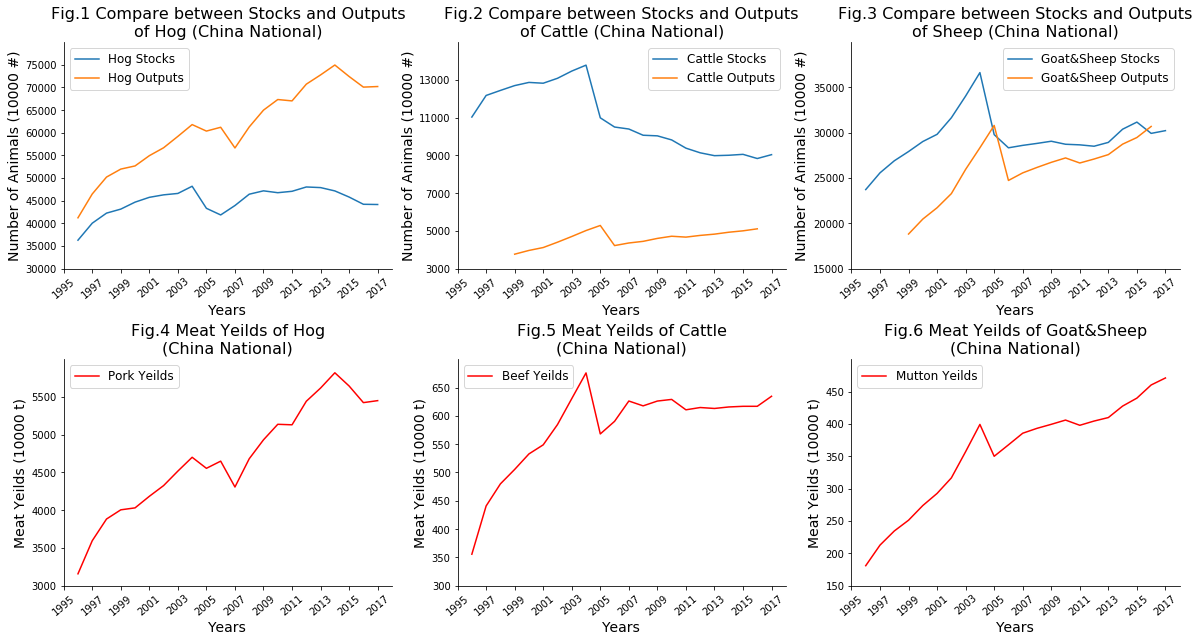

In [9]:
# create figure
fig = plt.figure()

fig.tight_layout()                          # adjust layout
plt.subplots_adjust(wspace =0.2, hspace =0.4) # adjust white space

fig_size = (20,10)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

# ======================================================== Fig.1 Compare between Stocks and Outputs\nof Hog (China National)  ====================================================
ax0 = fig.add_subplot(2,3,1)  # 2 row, 2 columns, 1st plot
df[AY+hog_inout][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, 
    ax=ax0)

plt.title("Fig.1 Compare between Stocks and Outputs\nof Hog (China National)", fontsize=tit_size)
plt.legend(['Hog Stocks','Hog Outputs'], loc='upper left', fontsize=leg_size)

ylim = [30000,80000,5000]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])

# ======================================================== Fig.2 Compare between Stocks and Outputs\nof Cattle (China National)  ==================================================
ax1 = fig.add_subplot(2,3,2)
df[AY+cattle_inout][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, 
    ax=ax1)

plt.title("Fig.2 Compare between Stocks and Outputs\nof Cattle (China National)",fontsize=tit_size)
plt.legend(['Cattle Stocks','Cattle Outputs'], loc='upper right', fontsize=leg_size)

ylim = [3000,15000,2000]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])

# ==================================================== Fig.3 Compare between Stocks and Outputs\nof Sheep (China National)  ================================================
ax2 = fig.add_subplot(2,3,3)
df[AY+gs_inout][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size,
    ax=ax2)

plt.title("Fig.3 Compare between Stocks and Outputs\nof Sheep (China National)",fontsize=tit_size)
plt.legend(['Goat&Sheep Stocks','Goat&Sheep Outputs'], loc='upper right', fontsize=leg_size)

ylim = [15000,40000,5000]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])

# ===================================================== Fig.4 Meat Yeilds of Hog\n(China National)  ================================================================
ax3 = fig.add_subplot(2,3,4)  # 2 row, 2 columns, 1st plot

df[AY+['MeatYeild_hog']][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, 
    color='red',
    ax=ax3)
plt.title("Fig.4 Meat Yeilds of Hog\n(China National)", fontsize=tit_size)
plt.legend(['Pork Yeilds'], loc='upper left', fontsize=leg_size)

ylim = [3000,6000,500]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])

# ==================================================== Fig.5 Meat Yeilds of Cattle\n(China National)  ============================================================
ax4 = fig.add_subplot(2,3,5)
df[AY+['MeatYeild_cattle']][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, 
    color='red',
    ax=ax4)
plt.title("Fig.5 Meat Yeilds of Cattle\n(China National)",fontsize=tit_size)
plt.legend(['Beef Yeilds'], loc='upper left', fontsize=leg_size)

ylim = [300,700,50]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])

# ===================================================== Fig.6 Meat Yeilds of Goat&Sheep\n(China National)  ====================================================
ax5 = fig.add_subplot(2,3,6)
df[AY+['MeatYeild_gt_shp']][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size,
    color='red',     
    ax=ax5)

plt.title("Fig.6 Meat Yeilds of Goat&Sheep\n(China National)",fontsize=tit_size)
plt.legend(['Mutton Yeilds'], loc='upper left', fontsize=leg_size)

ylim = [150,500,50]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])



# set xlabels 
#================================================================
def setLabels_inout(ax):
    
    xlabels = range(1995,year_now,2)
    ax.set_xlabel('Years', fontsize=lab_size)
    ax.set_xticks(xlabels)
    ax.set_xticklabels(xlabels, rotation=40, ha='center')
    ax.set_xlim(1995,year_now-1)
    
    ax.set_ylabel('Number of Animals (10000 #)', fontsize=lab_size)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for ax in [ax0, ax1, ax2]:
    setLabels_inout(ax)
    
#================================================================    
def setLabels_yeild(ax):
    
    xlabels = range(1995,year_now,2)
    ax.set_xlabel('Years', fontsize=lab_size)
    ax.set_xticks(xlabels)
    ax.set_xticklabels(xlabels, rotation=40, ha='center')
    ax.set_xlim(1995,year_now-1)
    
    ax.set_ylabel('Meat Yeilds (10000 t)', fontsize=lab_size)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for ax in [ax3, ax4, ax5]:
    setLabels_yeild(ax)
    
plt.show()

图1和图4：猪的存栏量平缓，出栏量和产肉量迅猛增加，说明总体规模稳定，但迅速向集约化发展

图2和图5：牛的存栏量下降，出栏量和产肉量稳定，说明总体规模在缩减，但集约化程度增加

图3和图6：羊的存栏量稳步增长，出栏量和产肉量增长率更快，说明总体规模在稳步增加，且集约化程度也有所增加

2003~2005年，所有养殖产业有一次重大调整

## Outputs of Poultry, and Yeilds of Egg

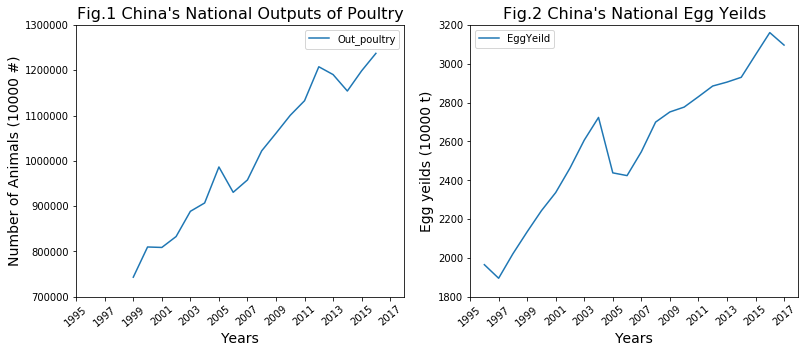

In [16]:
# create figure
fig = plt.figure()

fig.tight_layout()                          # adjust layout
plt.subplots_adjust(wspace =0.2, hspace =0) # adjust white space

fig_size = (20,5)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

# =================================================== Fig.1 China's National Outputs of Poultry =========================================================
ax0 = fig.add_subplot(1,3,1)  # 2 row, 2 columns, 1st plot
df[AY+birds_out][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, 
    ax=ax0)

plt.title("Fig.1 China's National Outputs of Poultry", fontsize=tit_size)

plt.ylabel('Number of Animals (10000 #)', fontsize=lab_size)
plt.ylim(700000, 1300000)

xlabels = range(1995,year_now,2)
plt.xlabel('Years', fontsize=lab_size)
plt.xticks(xlabels,rotation=40)
plt.xlim(1995,year_now-1)

plt.legend(['Poultry Outputs'], loc='upper left', fontsize=leg_size)

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

# ======================================================= Fig.2 China's National Egg Yeilds ===============================================================
ax1 = fig.add_subplot(1,3,2)
df[AY+birds_egg][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, 
    ax=ax1)

plt.title("Fig.2 China's National Egg Yeilds",fontsize=tit_size)
plt.ylabel('Egg yeilds (10000 t)', fontsize=lab_size)
plt.ylim(1800,3200)

xlabels = range(1995,year_now,2)
plt.xlabel('Years', fontsize=lab_size)
plt.xticks(xlabels, rotation=40)
plt.xlim(1995,year_now-1)

plt.legend(['Egg Yeilds'], loc='upper left', fontsize=leg_size)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
    
plt.show()

### Chinas National Animal Products for Food

<Figure size 1152x576 with 0 Axes>

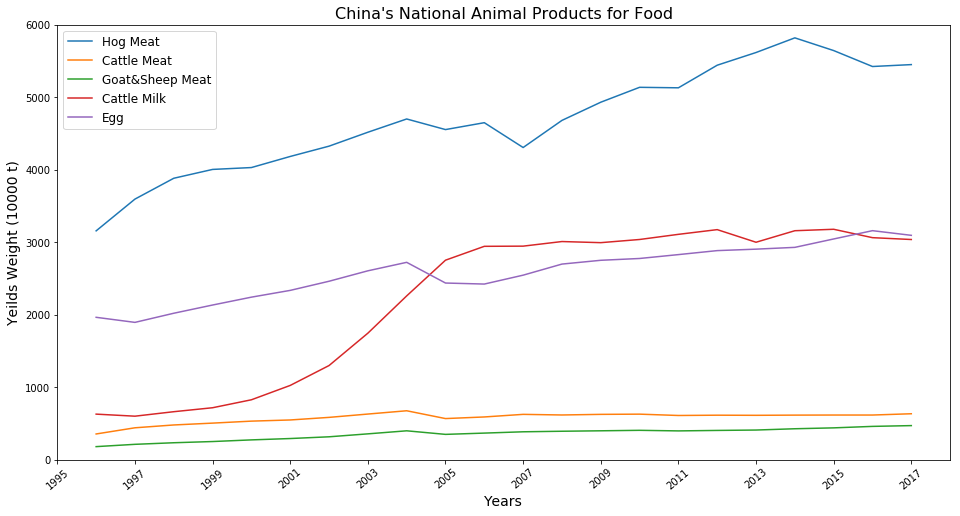

In [10]:
# create figure

fig_size = (16,8)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

fig = plt.figure(figsize = fig_size)

# draw data
ax = df[AY+yeilds][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size)
plt.ylim(0,6000)

plt.title("China's National Animal Products for Food", fontsize=tit_size)
plt.ylabel('Yeilds Weight (10000 t)', fontsize=lab_size)
plt.xlabel('Years', fontsize=lab_size)
plt.legend(labels=['Hog Meat','Cattle Meat', 'Goat&Sheep Meat', 'Cattle Milk', 'Egg'], loc='upper left', fontsize=leg_size)

xlabels = range(1995,year_now,2)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, rotation=40, ha='center')
ax.set_xlim(1995,year_now-1)
  
plt.show()